Data from kaggle.com/maitree/wine-quality-selection
Some code used from and inspired by kaggle.com/choonmengyap/winesclustering-eda-kmeans-mlp

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn import metrics

In [5]:
dfRed = pd.read_csv('winequality_red.csv')
dfRed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
dfWhite = pd.read_csv('winequality_white.csv')
dfWhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
dfAll = dfRed.append(dfWhite) #Creating a dataframe with both red and white wine in order to create clusters of both which would allow recommendations of 'if you liked X red, you may also like Y white'
dfAll

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
dfRed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
dfRed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
dfWhite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
dfWhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [12]:
dfAll.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:>

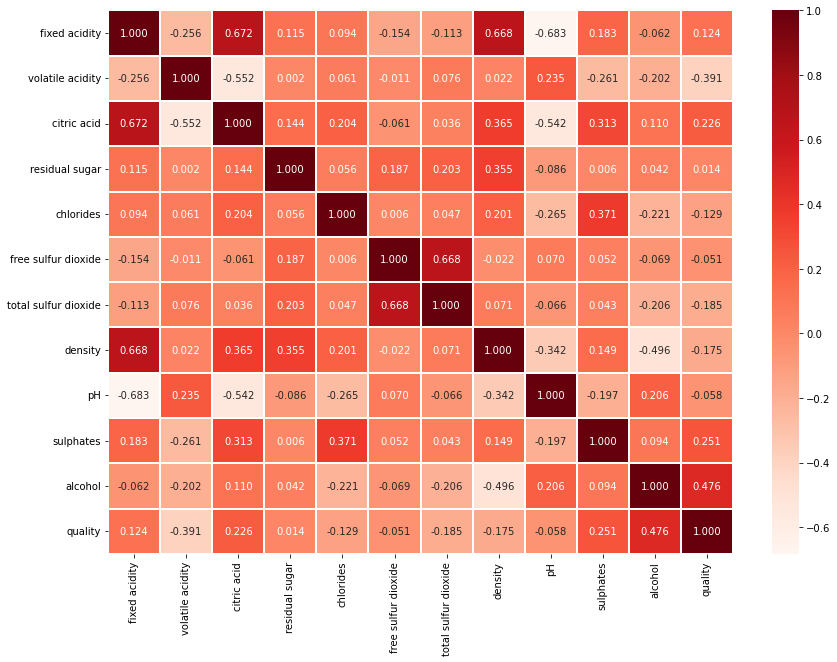

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(dfRed.corr(),annot=True,cmap='Reds',fmt='.3f',linewidths=2)

<AxesSubplot:>

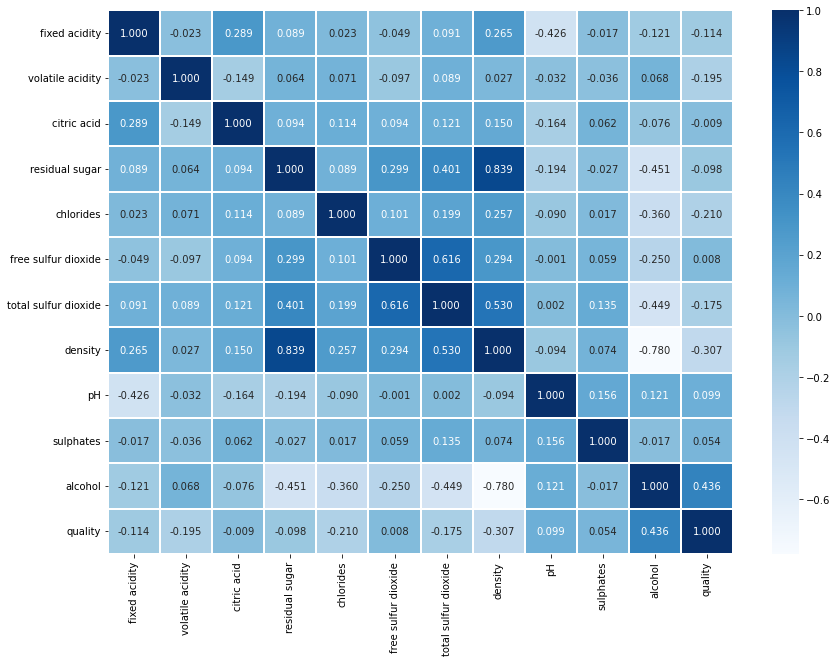

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(dfWhite.corr(), annot=True, cmap='Blues',fmt='.3f',linewidths=2)

<AxesSubplot:>

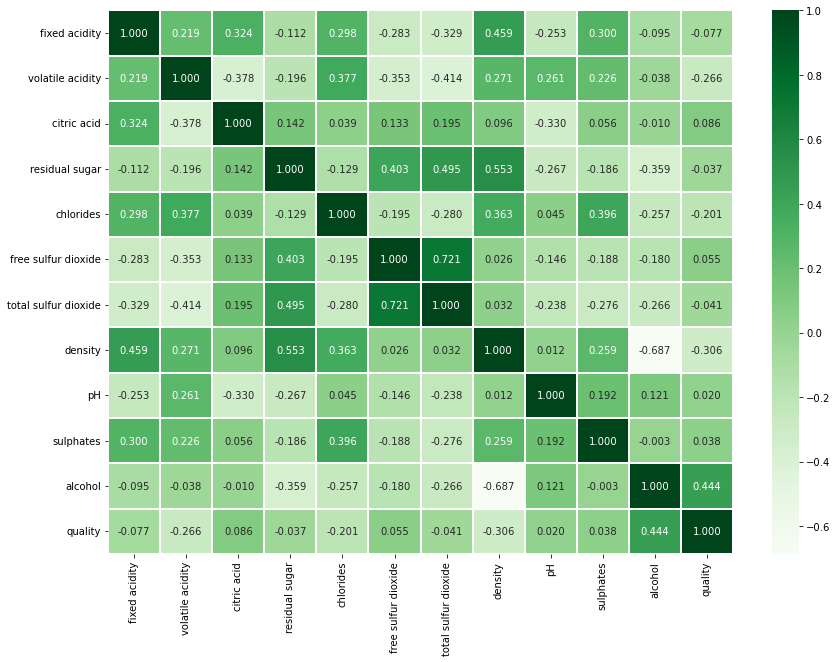

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(dfAll.corr(), annot=True, cmap='Greens',fmt='.3f',linewidths=2)

Alcohol is the feature most highly correlated to quality

# Preprocessing
In order to produce a model for recommendations (i.e. 'if you liked wine X, you may also like wines Y and Z') in the same clusters, or clustered close to each other, I'll drop the 'quality' feature, as the chemical features of the wine should correlate in a large part to the flavour, whereas wines of the same 'quality' may taste different due to different chemical compositions, and so would not necessarily be good recommendations

In [17]:
xR = dfRed.drop(['quality'], axis=1)
xW = dfWhite.drop(['quality'], axis=1)
xA = dfAll.drop(['quality'], axis=1)

In [18]:
scaler = RobustScaler() # gives a better results in accuracy and clearer cluster distinction than StandardScaler()
scaler

RobustScaler()

In [19]:
xRScaled = pd.DataFrame(scaler.fit_transform(xR), columns=xR.columns)
xRScaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50


In [20]:
xWScaled = pd.DataFrame(scaler.fit_transform(xW), columns=xW.columns)
xWScaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.2,0.090909,0.333333,1.890244,0.142857,0.478261,0.610169,1.658481,-0.947368,-0.142857,-0.842105
1,-0.5,0.363636,0.166667,-0.439024,0.428571,-0.869565,-0.033898,0.059395,0.631579,0.142857,-0.473684
2,1.3,0.181818,0.666667,0.207317,0.500000,-0.173913,-0.627119,0.310680,0.421053,-0.214286,-0.157895
3,0.4,-0.272727,0.000000,0.402439,1.071429,0.565217,0.881356,0.424900,0.052632,-0.500000,-0.263158
4,0.4,-0.272727,0.000000,0.402439,1.071429,0.565217,0.881356,0.424900,0.052632,-0.500000,-0.263158


In [21]:
xAScaled = pd.DataFrame(scaler.fit_transform(xA), columns=xA.columns)
xAScaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,2.411765,-2.214286,-0.174603,1.074074,-0.750000,-1.063291,0.625806,1.428571,0.294118,-0.500000
1,0.615385,3.470588,-2.214286,-0.063492,1.888889,-0.166667,-0.645570,0.410753,-0.047619,1.000000,-0.277778
2,0.615385,2.764706,-1.928571,-0.111111,1.666667,-0.583333,-0.810127,0.453763,0.238095,0.823529,-0.277778
3,3.230769,-0.058824,1.785714,-0.174603,1.037037,-0.500000,-0.734177,0.668817,-0.238095,0.411765,-0.277778
4,0.307692,2.411765,-2.214286,-0.174603,1.074074,-0.750000,-1.063291,0.625806,1.428571,0.294118,-0.500000


# Clustering
Using KMeans

C:\Users\matt_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


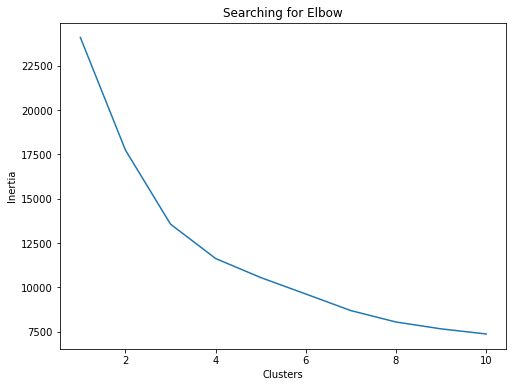

In [22]:
#Finding the 'elbow' for number of clusters

inertiaR = []

for i in range(1, 11):
    kmR = KMeans(n_clusters=i).fit(xRScaled)
    inertiaR.append(kmR.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=inertiaR, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

Going to go with 3 for reds (so will likely also go with 3 for whites and all for comparison)

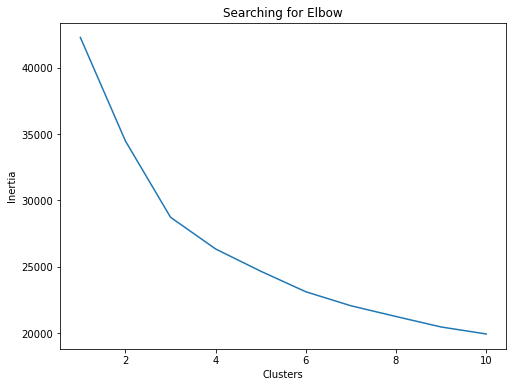

In [23]:
#Finding the 'elbow' for number of clusters

inertiaW = []

for i in range(1, 11):
    kmW = KMeans(n_clusters=i).fit(xWScaled)
    inertiaW.append(kmW.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=inertiaW, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

3 clusters also looking good for whites

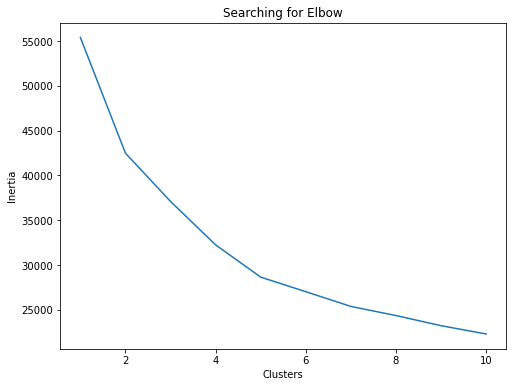

In [25]:
#Finding the 'elbow' for number of clusters

inertiaA = []

for i in range(1, 11):
    kmA = KMeans(n_clusters=i).fit(xAScaled)
    inertiaA.append(kmA.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=inertiaA, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

For all wines looking like 2 or 5 clusters would be best. Will probably run this for 2 and 5 (I'd think that 2 clusters may just separate red and white, but could be wrong), as well as 3 for comparison to the other graphs.

In [41]:
kmeansR = KMeans(n_clusters=3, random_state=1) #RED
kmeansR.fit(xRScaled)

KMeans(n_clusters=3, random_state=1)

In [42]:
clustersR = kmeansR.predict(xRScaled) #RED

In [43]:
kmeansW = KMeans(n_clusters=3, random_state=1) #WHITE
kmeansW.fit(xWScaled)

KMeans(n_clusters=3, random_state=1)

In [44]:
clustersW = kmeansW.predict(xWScaled) #WHITE

In [45]:
kmeansA3 = KMeans(n_clusters=3, random_state=1) #ALL, 3 CLUSTERS
kmeansA3.fit(xAScaled)

KMeans(n_clusters=3, random_state=1)

In [47]:
clustersA3 = kmeansA3.predict(xAScaled) #ALL, 3 CLUSTERS

In [48]:
kmeansA2 = KMeans(n_clusters=2, random_state=1) #ALL, 2 CLUSTERS
kmeansA2.fit(xAScaled)

KMeans(n_clusters=2, random_state=1)

In [49]:
clustersA2 = kmeansA2.predict(xAScaled) #ALL, 2 CLUSTERS

In [50]:
kmeansA5 = KMeans(n_clusters=5, random_state=1) #ALL, 5 CLUSTERS
kmeansA5.fit(xAScaled)

KMeans(n_clusters=5, random_state=1)

In [51]:
clustersA5 = kmeansA5.predict(xAScaled) #ALL, 5 CLUSTERS

# PCA and Visualisation

In [52]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

RED

In [53]:
xR_pca = pd.DataFrame(pca.fit_transform(xRScaled), columns=['PC1', 'PC2']) #RED
xR_pca['cluster'] = clustersR # Assign each row their respective cluster to use it to colour the clusters later

In [54]:
kmeansR.cluster_centers_ #RED

array([[ 1.97072072e-01,  2.79729730e-02,  7.08435708e-03,
         1.08301158e-01,  1.11689189e-01,  1.12331081e-01,
         1.75996622e-01, -4.79956467e-02,  3.47083926e-02,
         1.60735736e-01,  1.44123029e-01],
       [ 1.73160173e-01,  1.04242424e-01,  6.32690542e-01,
        -2.46753247e-01,  1.38272727e+01, -5.08658009e-02,
         2.21969697e-01,  1.28804827e-01, -9.48963317e-01,
         2.37878788e+00, -3.82575758e-01],
       [ 2.57475083e-01,  6.02325581e-02,  2.53699789e-01,
         7.23006645e+00,  6.43023256e-01,  5.76411960e-01,
         8.22093023e-01,  7.48920452e-01, -1.24235006e-01,
         2.61627907e-01,  2.57751938e-01]])

In [55]:
centersR_pca = pd.DataFrame(pca.fit_transform(kmeansR.cluster_centers_), columns=['PC1', 'PC2']) #RED
centersR_pca

,PC1,PC2
0,-3.842599,3.727050
1,9.479615,-0.442419
2,-5.637015,-3.284631


Text(0, 0.5, 'PC2')

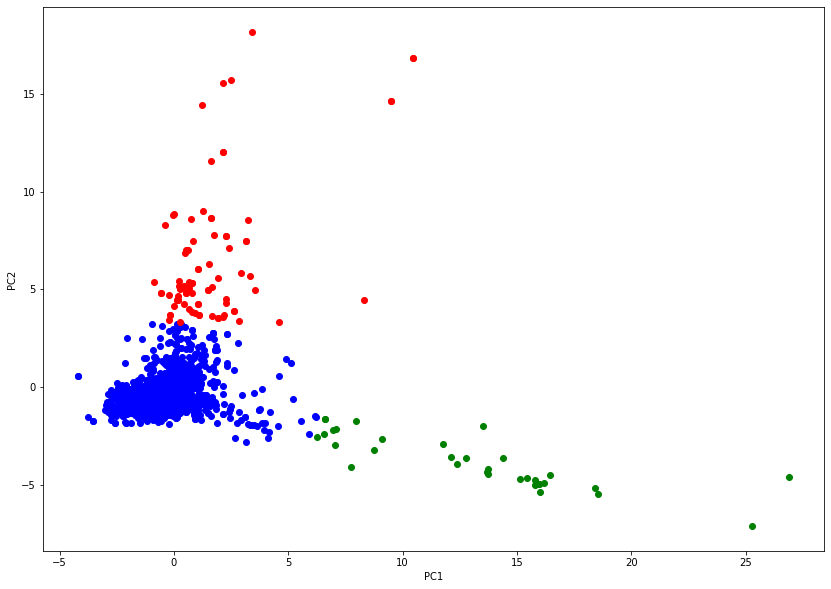

In [76]:
# Plotting our clusters  #RED
plt.figure(figsize=(14, 10))
plt.scatter(xR_pca[xR_pca['cluster']==0].loc[:, 'PC1'], xR_pca[xR_pca['cluster']==0].loc[:, 'PC2'], color = 'blue')
plt.scatter(xR_pca[xR_pca['cluster']==1].loc[:, 'PC1'], xR_pca[xR_pca['cluster']==1].loc[:, 'PC2'], color = 'green')
plt.scatter(xR_pca[xR_pca['cluster']==2].loc[:, 'PC1'], xR_pca[xR_pca['cluster']==2].loc[:, 'PC2'], color = 'red')


plt.xlabel('PC1')
plt.ylabel('PC2')

WHITE

In [57]:
xW_pca = pd.DataFrame(pca.fit_transform(xWScaled), columns=['PC1', 'PC2']) #WHITE
xW_pca['cluster'] = clustersW # Assign each row their respective cluster to use it to colour the clusters later

In [58]:
kmeansW.cluster_centers_

array([[ 0.28244654,  0.16242485,  0.39893088,  0.61186947,  0.49836613,
         0.43736622,  0.6024366 ,  0.67328153, -0.10332644,  0.22497691,
        -0.41842236],
       [-0.10188679,  0.50986278,  0.98899371, -0.07305568,  8.5902965 ,
         0.26517637,  0.16149664,  0.14600821, -0.44538232, -0.03706199,
        -0.43694141],
       [-0.10386552,  0.15517636, -0.11788326, -0.18377316, -0.33903529,
        -0.2262089 , -0.31161818, -0.37680672,  0.16832264,  0.08840602,
         0.4251462 ]])

In [59]:
centersW_pca = pd.DataFrame(pca.fit_transform(kmeansW.cluster_centers_), columns=['PC1', 'PC2'])

Text(0, 0.5, 'PC2')

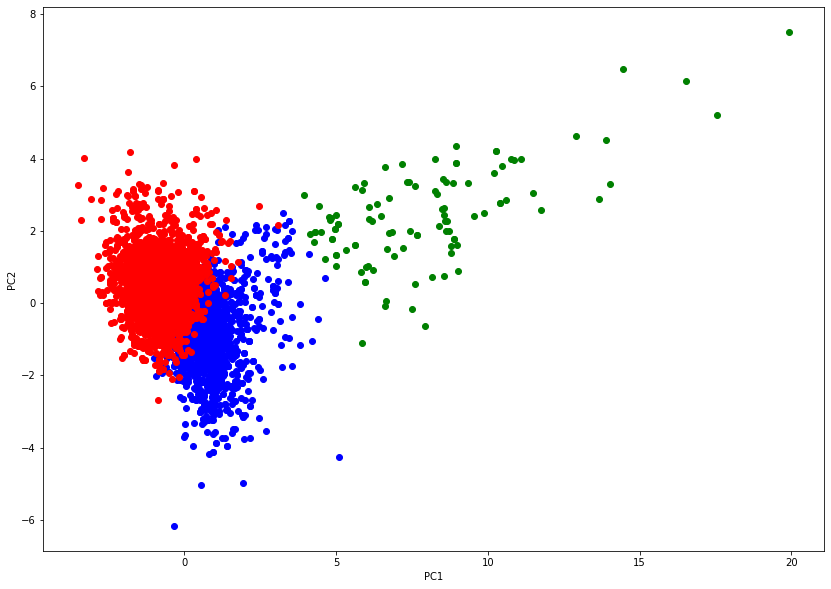

In [77]:
plt.figure(figsize=(14, 10))
plt.scatter(xW_pca[xW_pca['cluster']==0].loc[:, 'PC1'], xW_pca[xW_pca['cluster']==0].loc[:, 'PC2'], color = 'blue')
plt.scatter(xW_pca[xW_pca['cluster']==1].loc[:, 'PC1'], xW_pca[xW_pca['cluster']==1].loc[:, 'PC2'], color = 'green')
plt.scatter(xW_pca[xW_pca['cluster']==2].loc[:, 'PC1'], xW_pca[xW_pca['cluster']==2].loc[:, 'PC2'], color = 'red')

plt.xlabel('PC1')
plt.ylabel('PC2')

ALL - 3 CLUSTERS

In [61]:
xA3_pca = pd.DataFrame(pca.fit_transform(xAScaled), columns=['PC1', 'PC2']) #ALL3
xA3_pca['cluster'] = clustersA3 # Assign each row their respective cluster to use it to colour the clusters later

In [62]:
kmeansA3.cluster_centers_

array([[-2.77555756e-17, -6.95304438e-02,  3.99475251e-01,
         1.32372598e+00,  1.02481319e-01,  7.01137610e-01,
         6.63207167e-01,  4.55942275e-01, -2.67883250e-01,
        -1.02521930e-01, -4.05793129e-01],
       [-1.88674723e-01, -9.10906179e-02,  2.11779038e-02,
         6.26955494e-02, -2.49128433e-01, -1.03859189e-02,
        -1.06197923e-02, -5.76645965e-01,  3.13139359e-02,
        -1.11589142e-01,  4.70317530e-01],
       [ 1.01681508e+00,  1.41790423e+00, -2.41731175e-01,
        -5.29556650e-02,  1.69118318e+00, -5.13726396e-01,
        -8.39161003e-01,  4.04176598e-01,  4.04028853e-01,
         8.25159374e-01, -9.46451377e-04]])

In [63]:
centersA3_pca = pd.DataFrame(pca.fit_transform(kmeansA3.cluster_centers_), columns=['PC1', 'PC2'])

Text(0, 0.5, 'PC2')

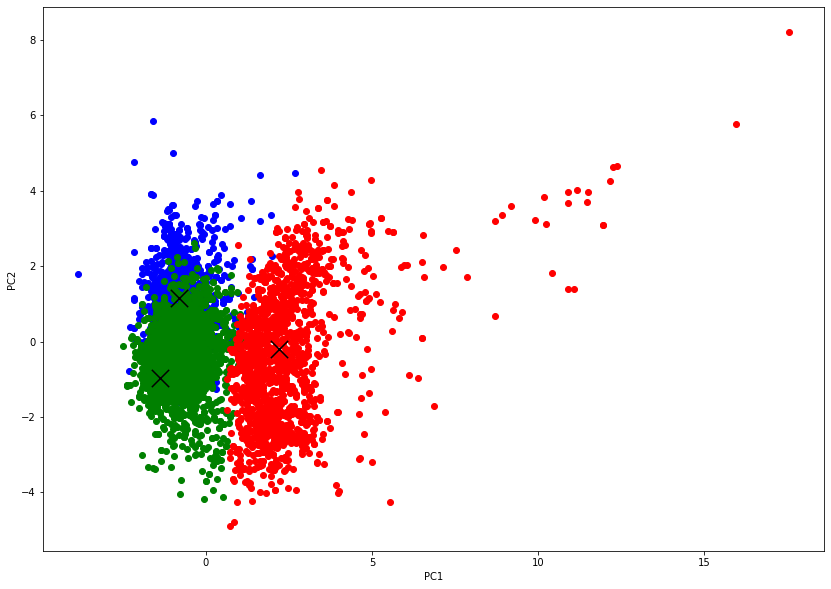

In [64]:
plt.figure(figsize=(14, 10))
plt.scatter(xA3_pca[xA3_pca['cluster']==0].loc[:, 'PC1'], xA3_pca[xA3_pca['cluster']==0].loc[:, 'PC2'], color = 'blue')
plt.scatter(xA3_pca[xA3_pca['cluster']==1].loc[:, 'PC1'], xA3_pca[xA3_pca['cluster']==1].loc[:, 'PC2'], color = 'green')
plt.scatter(xA3_pca[xA3_pca['cluster']==2].loc[:, 'PC1'], xA3_pca[xA3_pca['cluster']==2].loc[:, 'PC2'], color = 'red')

plt.scatter(centersA3_pca['PC1'], centersA3_pca['PC2'], marker='x', color='black', s=300)
plt.xlabel('PC1')
plt.ylabel('PC2')

ALL - 2 CLUSTERS

In [65]:
xA2_pca = pd.DataFrame(pca.fit_transform(xAScaled), columns=['PC1', 'PC2']) #RED
xA2_pca['cluster'] = clustersA2 # Assign each row their respective cluster to use it to colour the clusters later

In [66]:
kmeansA2.cluster_centers_

array([[ 0.97194087,  1.39177308, -0.24398407, -0.0409441 ,  1.66743553,
        -0.50746342, -0.82587804,  0.38998967,  0.41043891,  0.81062033,
         0.01571767],
       [-0.11695154, -0.09320552,  0.16877988,  0.53807247, -0.13250498,
         0.2636666 ,  0.25087155, -0.19282782, -0.08917065, -0.11512832,
         0.13839003]])

In [67]:
centersA2_pca = pd.DataFrame(pca.fit_transform(kmeansA2.cluster_centers_), columns=['PC1', 'PC2'])

Text(0, 0.5, 'PC2')

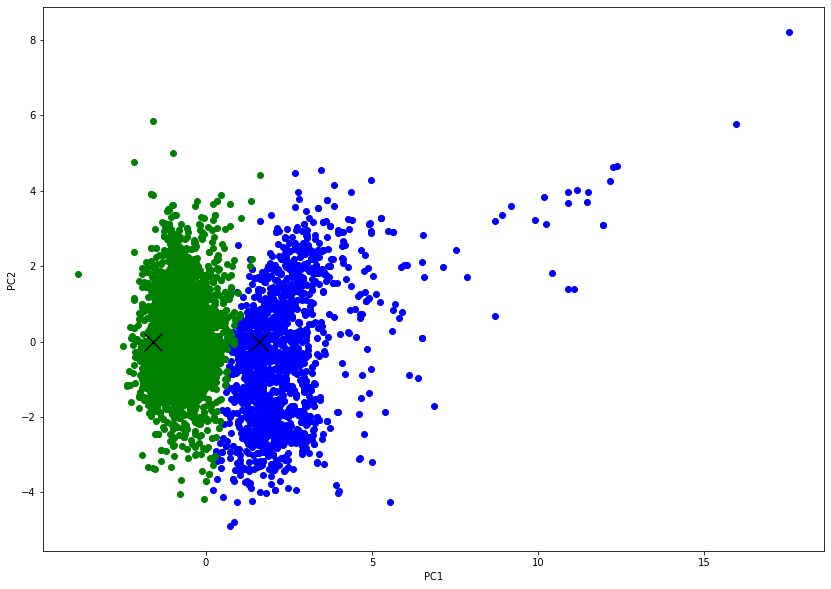

In [68]:
plt.figure(figsize=(14, 10))
plt.scatter(xA2_pca[xA2_pca['cluster']==0].loc[:, 'PC1'], xA2_pca[xA2_pca['cluster']==0].loc[:, 'PC2'], color = 'blue')
plt.scatter(xA2_pca[xA2_pca['cluster']==1].loc[:, 'PC1'], xA2_pca[xA2_pca['cluster']==1].loc[:, 'PC2'], color = 'green')
plt.scatter(xA2_pca[xA2_pca['cluster']==2].loc[:, 'PC1'], xA2_pca[xA2_pca['cluster']==2].loc[:, 'PC2'], color = 'red')

plt.scatter(centersA2_pca['PC1'], centersA2_pca['PC2'], marker='x', color='black', s=300)
plt.xlabel('PC1')
plt.ylabel('PC2')

ALL - 5 CLUSTERS

In [69]:
xA5_pca = pd.DataFrame(pca.fit_transform(xAScaled), columns=['PC1', 'PC2']) #RED
xA5_pca['cluster'] = clustersA5 # Assign each row their respective cluster to use it to colour the clusters later

In [70]:
kmeansA5.cluster_centers_

array([[ 2.22370866e+00,  6.74528749e-01,  1.10248447e+00,
        -4.58553792e-02,  1.27864257e+00, -6.02522813e-01,
        -9.14021892e-01,  5.53547002e-01, -4.67755540e-03,
         1.20687695e+00,  1.92580664e-01],
       [-1.33538120e-02, -6.74203126e-02,  3.72355598e-01,
         1.33555186e+00,  9.91557281e-02,  7.00915141e-01,
         6.63735546e-01,  4.62059053e-01, -2.59039168e-01,
        -1.00649245e-01, -4.09934061e-01],
       [-1.82790224e-01, -1.32762270e-01,  6.65551353e-02,
         6.67975948e-02, -2.60315305e-01,  4.65320208e-03,
         4.23659629e-03, -5.85170342e-01,  1.01186435e-02,
        -1.25234615e-01,  4.75358301e-01],
       [ 2.10947625e-01,  1.88622981e+00, -1.25598188e+00,
        -7.22859345e-02,  1.13724627e+00, -4.96696399e-01,
        -8.00278506e-01,  2.51698157e-01,  7.49256690e-01,
         4.97872092e-01, -3.90191976e-02],
       [ 3.80052151e-01,  7.51744766e-01,  9.81840194e-01,
         1.37812752e-01,  6.95260515e+00,  9.14548023e-02,
  

In [71]:
centersA5_pca = pd.DataFrame(pca.fit_transform(kmeansA5.cluster_centers_), columns=['PC1', 'PC2'])

Text(0, 0.5, 'PC2')

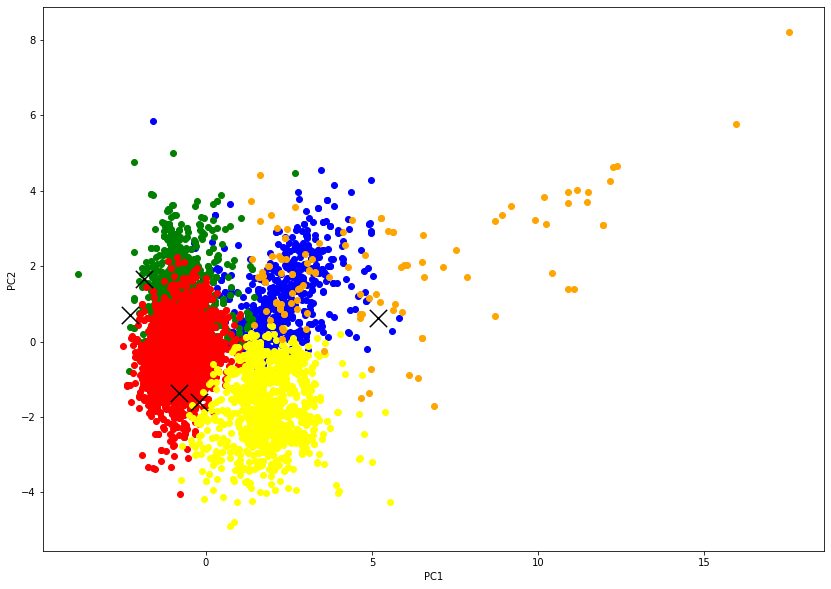

In [75]:
plt.figure(figsize=(14, 10))
plt.scatter(xA5_pca[xA5_pca['cluster']==0].loc[:, 'PC1'], xA5_pca[xA5_pca['cluster']==0].loc[:, 'PC2'], color = 'blue')
plt.scatter(xA5_pca[xA5_pca['cluster']==1].loc[:, 'PC1'], xA5_pca[xA5_pca['cluster']==1].loc[:, 'PC2'], color = 'green')
plt.scatter(xA5_pca[xA5_pca['cluster']==2].loc[:, 'PC1'], xA5_pca[xA5_pca['cluster']==2].loc[:, 'PC2'], color = 'red')
plt.scatter(xA5_pca[xA5_pca['cluster']==3].loc[:, 'PC1'], xA5_pca[xA5_pca['cluster']==3].loc[:, 'PC2'], color = 'yellow')
plt.scatter(xA5_pca[xA5_pca['cluster']==4].loc[:, 'PC1'], xA5_pca[xA5_pca['cluster']==4].loc[:, 'PC2'], color = 'orange')

plt.scatter(centersA5_pca['PC1'], centersA5_pca['PC2'], marker='x', color='black', s=300)
plt.xlabel('PC1')
plt.ylabel('PC2')